# EDA for multivariate model

In [41]:
import pandas as pd
econ_df_multivariate = pd.read_csv('econ_df_1')

In [42]:
#Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# Create an instance of Elastic Net Regression
enet = ElasticNet(alpha=0.5, l1_ratio=0.5)


In [43]:
import pandas as pd
pd.DataFrame(econ_df_multivariate.head(10))


,Date,Dow Jones,WTI,Dollar/Euro,NASDAQ,Brent,US_CPI:energy:,US_CPI:total:,US_PPI:total,Fed Fund Effective,EU PPI,S&P500,Copper,Gold,Gas,Bitcoin
0,2000-01-01,NaN,NaN,NaN,NaN,NaN,115.0,169.3,128.3,5.45,58.9,NaN,NaN,NaN,NaN,NaN
1,2000-01-03,11357.500000,NaN,1.0155,4131.15,NaN,115.0,169.3,128.3,5.45,58.9,1455.219971,NaN,NaN,NaN,NaN
2,2000-01-04,10997.900391,25.56,1.0309,3901.69,23.95,115.0,169.3,128.3,5.45,58.9,1399.420044,NaN,NaN,NaN,NaN
3,2000-01-05,11122.700195,24.65,1.0335,3877.54,23.72,115.0,169.3,128.3,5.45,58.9,1402.109985,NaN,NaN,NaN,NaN
4,2000-01-06,11253.299805,24.79,1.0324,3727.13,23.55,115.0,169.3,128.3,5.45,58.9,1403.449951,NaN,NaN,NaN,NaN
5,2000-01-07,11522.599609,24.79,1.0294,3882.62,23.35,115.0,169.3,128.3,5.45,58.9,1441.469971,NaN,NaN,NaN,NaN
6,2000-01-10,11572.200195,24.71,1.0252,4049.67,22.77,115.0,169.3,128.3,5.45,58.9,1457.599976,NaN,NaN,NaN,NaN
7,2000-01-11,11511.099609,25.69,1.0322,3921.19,23.93,115.0,169.3,128.3,5.45,58.9,1438.560059,NaN,NaN,NaN,NaN
8,2000-01-12,11551.099609,26.30,1.0281,3850.02,24.62,115.0,169.3,128.3,5.45,58.9,1432.250000,NaN,NaN,NaN,NaN
9,2000-01-13,11582.400391,26.63,1.0270,3957.21,24.90,115.0,169.3,128.3,5.45,58.9,1449.680054,NaN,NaN,NaN,NaN


In [44]:
len(econ_df_multivariate)

6453

In [6]:


econ_df_multivariate.info()
econ_df_multivariate.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6453 entries, 0 to 6452
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                6453 non-null   object 
 1   Dow Jones           5405 non-null   float64
 2   WTI                 6123 non-null   float64
 3   Dollar/Euro         6119 non-null   float64
 4   NASDAQ              6142 non-null   float64
 5   Brent               6194 non-null   float64
 6   US_CPI:energy:      6453 non-null   float64
 7   US_CPI:total:       6453 non-null   float64
 8   US_PPI:total        6453 non-null   float64
 9   Fed Fund Effective  6453 non-null   float64
 10  EU PPI              6453 non-null   float64
 11  S&P500              6142 non-null   float64
 12  Copper              5964 non-null   float64
 13  Gold                5960 non-null   float64
 14  Gas                 5965 non-null   float64
 15  Bitcoin             2564 non-null   float64
dtypes: flo

Index(['Date', 'Dow Jones', 'WTI', 'Dollar/Euro', 'NASDAQ', 'Brent',
       'US_CPI:energy:', 'US_CPI:total:', 'US_PPI:total', 'Fed Fund Effective',
       'EU PPI', 'S&P500', 'Copper', 'Gold', 'Gas', 'Bitcoin'],
      dtype='object')

In [7]:
econ_df_multivariate.index = econ_df_multivariate['Date']
del econ_df_multivariate['Date']

In [8]:
econ_df_multivariate.dropna(subset = ['WTI'], inplace=True)

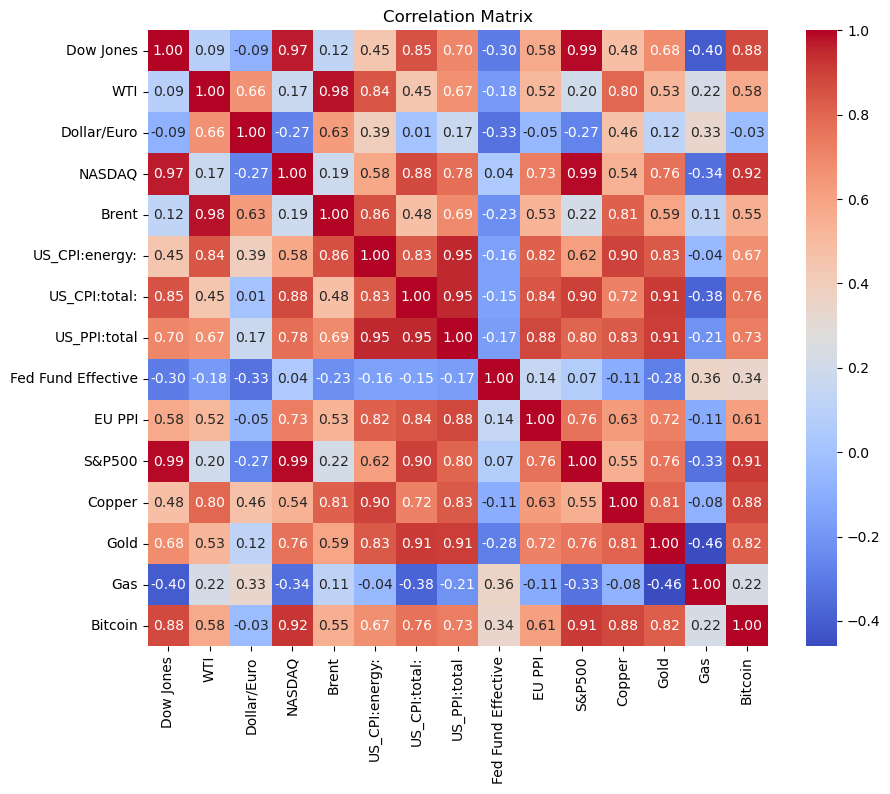

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = econ_df_multivariate.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()



We can notice here that correlation between Bitcoin and NASDAQis really high, that's why we can drop out Bitcoin. Furthermore, Bitcoin has data only from 2014, so it is beneficial to drop out this variable

In [10]:
econ_df_multivariate.columns

Index(['Dow Jones', 'WTI', 'Dollar/Euro', 'NASDAQ', 'Brent', 'US_CPI:energy:',
       'US_CPI:total:', 'US_PPI:total', 'Fed Fund Effective', 'EU PPI',
       'S&P500', 'Copper', 'Gold', 'Gas', 'Bitcoin'],
      dtype='object')

In [11]:
len(econ_df_multivariate.columns)

15

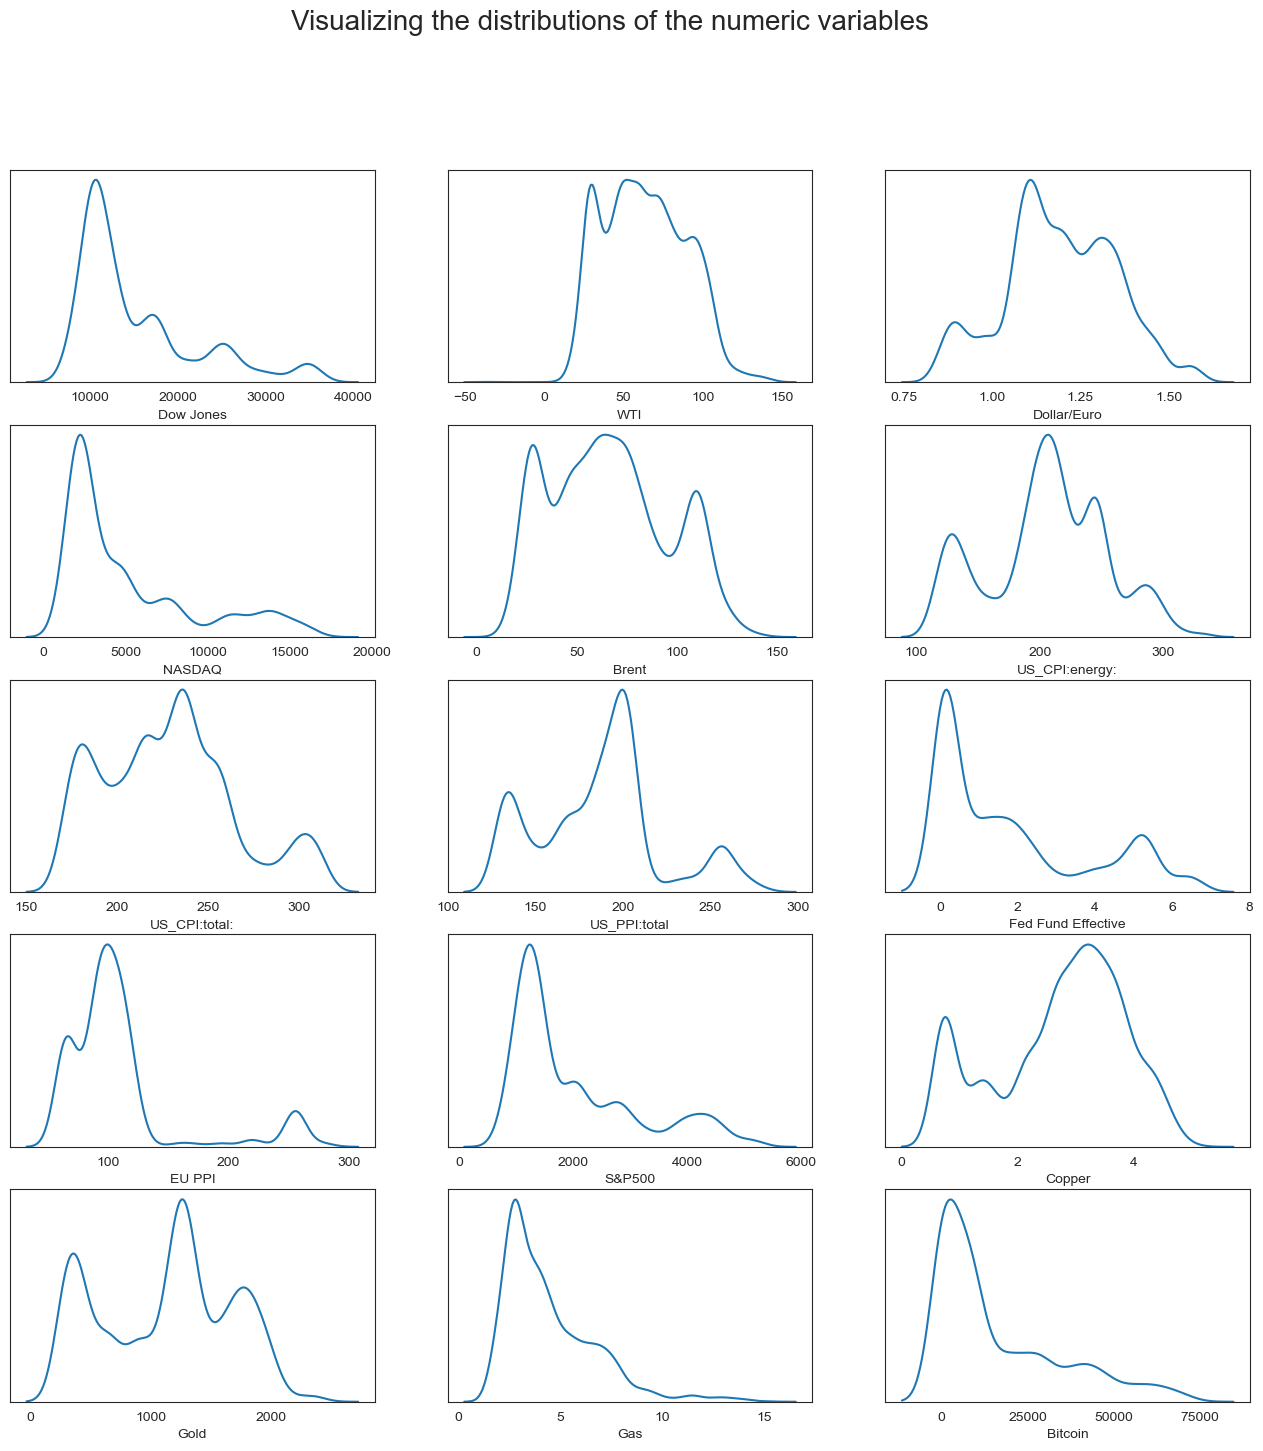

In [12]:
sns.set_style('white')

num_cols = econ_df_multivariate.columns
fig, axs = plt.subplots(nrows = 5, ncols=3, figsize=(16, 16))
for col, ax in zip(num_cols, axs.ravel()):
    sns.kdeplot(data=econ_df_multivariate, x=col, ax=ax, common_norm=False)
    ax.set_yticklabels('')
    ax.set_yticks([])
    ax.locator_params(axis='x', nbins=5)
    ax.set_ylabel('')

fig.suptitle('Visualizing the distributions of the numeric variables', fontsize=20)

plt.show()

In [13]:
econ_df_multivariate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6123 entries, 2000-01-04 to 2024-05-28
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Dow Jones           5385 non-null   float64
 1   WTI                 6123 non-null   float64
 2   Dollar/Euro         6070 non-null   float64
 3   NASDAQ              6115 non-null   float64
 4   Brent               6075 non-null   float64
 5   US_CPI:energy:      6123 non-null   float64
 6   US_CPI:total:       6123 non-null   float64
 7   US_PPI:total        6123 non-null   float64
 8   Fed Fund Effective  6123 non-null   float64
 9   EU PPI              6123 non-null   float64
 10  S&P500              6115 non-null   float64
 11  Copper              5947 non-null   float64
 12  Gold                5944 non-null   float64
 13  Gas                 5949 non-null   float64
 14  Bitcoin             2431 non-null   float64
dtypes: float64(15)
memory usage: 894.4+ KB


In [14]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [15]:
l = len(econ_df_multivariate)
round((econ_df_multivariate.isnull().sum()/l)*100, 2)

Dow Jones             12.05
WTI                    0.00
Dollar/Euro            0.87
NASDAQ                 0.13
Brent                  0.78
US_CPI:energy:         0.00
US_CPI:total:          0.00
US_PPI:total           0.00
Fed Fund Effective     0.00
EU PPI                 0.00
S&P500                 0.13
Copper                 2.87
Gold                   2.92
Gas                    2.84
Bitcoin               60.30
dtype: float64

In [16]:
econ_df_multivariate.interpolate(inplace=True)

In [17]:
l = len(econ_df_multivariate)
round((econ_df_multivariate.isnull().sum()/l)*100, 2)

Dow Jones              0.00
WTI                    0.00
Dollar/Euro            0.00
NASDAQ                 0.00
Brent                  0.00
US_CPI:energy:         0.00
US_CPI:total:          0.00
US_PPI:total           0.00
Fed Fund Effective     0.00
EU PPI                 0.00
S&P500                 0.00
Copper                 2.69
Gold                   2.69
Gas                    2.69
Bitcoin               60.30
dtype: float64

In [18]:

econ_df_multivariate_new = econ_df_multivariate.copy()

In [19]:
print(econ_df_multivariate['Gas'])
pd.set_option('display.max_rows', None)

Date
2000-01-04      NaN
2000-01-05      NaN
2000-01-06      NaN
2000-01-07      NaN
2000-01-10      NaN
              ...  
2024-05-21    2.671
2024-05-22    2.842
2024-05-23    2.657
2024-05-24    2.520
2024-05-28    2.590
Name: Gas, Length: 6123, dtype: float64


From this notebool it was obtained that the best outlier removal technique is Mahalanobis Outlier Removal technique  https://github.com/nikhils10/Multivariate-Analysis--Oil-Price-Prediction-Using-LSTM-GRU-  

In [20]:

##Spearman Correlation In Tabular Form
econ_df_multivariate.corr(method='spearman')

,Dow Jones,WTI,Dollar/Euro,NASDAQ,Brent,US_CPI:energy:,US_CPI:total:,US_PPI:total,Fed Fund Effective,EU PPI,S&P500,Copper,Gold,Gas,Bitcoin
Dow Jones,1.000000,0.354089,-0.177538,0.966916,0.405083,0.661852,0.918965,0.812940,-0.131736,0.712783,0.982485,0.592238,0.802328,-0.450705,0.940772
WTI,0.354089,1.000000,0.617105,0.285723,0.987825,0.884935,0.424447,0.726181,-0.266311,0.809027,0.266406,0.822922,0.550772,0.188183,0.623215
Dollar/Euro,-0.177538,0.617105,1.000000,-0.253088,0.581939,0.339494,-0.061373,0.172253,-0.372145,0.230342,-0.272576,0.384271,0.049531,0.383658,-0.049352
NASDAQ,0.966916,0.285723,-0.253088,1.000000,0.340341,0.600866,0.889276,0.773107,-0.127867,0.665009,0.980432,0.584566,0.825678,-0.494384,0.963512
Brent,0.405083,0.987825,0.581939,0.340341,1.000000,0.912396,0.475535,0.772339,-0.287839,0.852110,0.314155,0.844296,0.611416,0.101263,0.608749
US_CPI:energy:,0.661852,0.884935,0.339494,0.600866,0.912396,1.000000,0.730510,0.932863,-0.267121,0.966135,0.581447,0.877361,0.798400,-0.095120,0.700647
US_CPI:total:,0.918965,0.424447,-0.061373,0.889276,0.475535,0.730510,1.000000,0.885212,-0.306405,0.795800,0.869402,0.613204,0.897111,-0.524386,0.922002
US_PPI:total,0.812940,0.726181,0.172253,0.773107,0.772339,0.932863,0.885212,1.000000,-0.367392,0.960762,0.745726,0.799796,0.903898,-0.309071,0.790136
Fed Fund Effective,-0.131736,-0.266311,-0.372145,-0.127867,-0.287839,-0.267121,-0.306405,-0.367392,1.000000,-0.312975,-0.039288,-0.219671,-0.383683,0.264693,0.175366
EU PPI,0.712783,0.809027,0.230342,0.665009,0.852110,0.966135,0.795800,0.960762,-0.312975,1.000000,0.635656,0.829600,0.847863,-0.226939,0.643825


In [21]:
#econ_df_multivariate.drop(['Bitcoin', 'S&P500', 'Dow Jones', 'US_CPI:energy:', 'EU PPI', 'US_PPI:total', 'US_CPI:total:', 'Fed Fund Effective'], axis=1, inplace=True)
#econ_df_multivariate.drop(['NASDAQ', 'Brent', 'Gas'],  axis=1, inplace=True)

#econ_df_multivariate.drop(['Gold'], axis=1, inplace=True)


In [22]:
econ_df_multivariate.columns

Index(['Dow Jones', 'WTI', 'Dollar/Euro', 'NASDAQ', 'Brent', 'US_CPI:energy:',
       'US_CPI:total:', 'US_PPI:total', 'Fed Fund Effective', 'EU PPI',
       'S&P500', 'Copper', 'Gold', 'Gas', 'Bitcoin'],
      dtype='object')

In [23]:
econ_df_multivariate = econ_df_multivariate[['WTI', 'Brent', 'Dollar/Euro']]

l = len(econ_df_multivariate)
round((econ_df_multivariate.isnull().sum()/l)*100, 2)
econ_df_multivariate.dropna(inplace=True)
len(econ_df_multivariate)
#addy

6123

In [24]:
from scipy.stats import zscore as zs

zscore = np.abs(zs(econ_df_multivariate['WTI']))
zscore_df = econ_df_multivariate.copy()
zscore_df['zscore'] = zscore
zscore_df.head(5)
len(zscore_df[zscore_df['zscore']>2])

zscore_df = zscore_df.loc[zscore_df['zscore']<2]
zscore_df.shape
del zscore_df['zscore']
econ_df_multivariate = zscore_df

In [25]:
mah_df = mah_df.loc[mah_df['Mahalanobis']<= 20]
del mah_df['Mahalanobis']
econ_df_multivariate = mah_df

NameError: name 'mah_df' is not defined

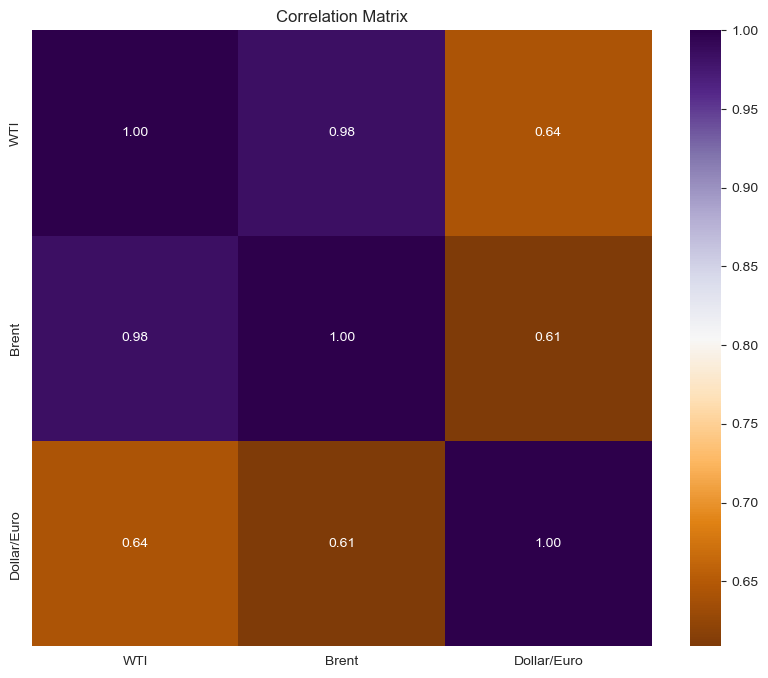

In [26]:
# Create a correlation matrix
corr_matrix = econ_df_multivariate.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='PuOr', fmt=".2f")

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()




from scipy.stats import zscore as zs

zscore = np.abs(zs(econ_df_multivariate["WTI"]))
zscore_df = econ_df_multivariate.copy()
zscore_df['zscore_wti'] = zscore
zscore_df['zscore_dollar'] = np.abs(zs(econ_df_multivariate["Dollar/Euro"]))
zscore_df['zscore_nasdaq'] = np.abs(zs(econ_df_multivariate["NASDAQ"]))
zscore_df['zscore_brent'] = np.abs(zs(econ_df_multivariate["Brent"]))
zscore_df['zscore_copper'] = np.abs(zs(econ_df_multivariate["Copper"]))
zscore_df['zscore_gas'] = np.abs(zs(econ_df_multivariate["Gas"]))
zscore_df.head(5)



print(zscore_df.shape)
zscore_df = zscore_df.loc[zscore_df['zscore_wti']<2]
zscore_df = zscore_df.loc[zscore_df['zscore_dollar']<2]
zscore_df = zscore_df.loc[zscore_df['zscore_nasdaq']<2]
zscore_df = zscore_df.loc[zscore_df['zscore_brent']<2]
zscore_df = zscore_df.loc[zscore_df['zscore_copper']<2]

zscore_df = zscore_df.loc[zscore_df['zscore_gas']<2]

zscore_df.shape

We can see that features are not normally distributed and the most frequent values of WTI are between 50 and 100

# Multivariate LSTM model

In [27]:
import numpy as np
col = ['US_CPI:total:']
clean_signal = econ_df_multivariate[col].values
clean_signal

import numpy as np 
mu, sigma = 0, 0.001
noise = np.random.normal(mu, sigma, [len(econ_df_multivariate),1])
noise

signal = clean_signal + noise
econ_df_multivariate[col] = signal

KeyError: "None of [Index(['US_CPI:total:'], dtype='object')] are in the [columns]"

In [ ]:
#'US_CPI:total:', 'US_PPI:total', 'Fed Fund Effective', 'EU PPI']]
#import numpy as np
#clean_signal = econ_df_multivariate['US_CPI:energy:']
#import numpy as np 
#mu, sigma = 0, 0.001
#noise = np.random.normal(mu, sigma, clean_signal.shape)
#signal = clean_signal + noise

#econ_df_multivariate['US_CPI:energy:'] = signal
#plt.plot(econ_df_multivariate['US_CPI:energy:'])

In [34]:
econ_df_multivariate.head(100)

,WTI,Brent,Dollar/Euro
Date,,,
2000-01-04,25.56,23.950,1.0309
2000-01-05,24.65,23.720,1.0335
2000-01-06,24.79,23.550,1.0324
2000-01-07,24.79,23.350,1.0294
2000-01-10,24.71,22.770,1.0252
2000-01-11,25.69,23.930,1.0322
2000-01-12,26.30,24.620,1.0281
2000-01-13,26.63,24.900,1.0270
2000-01-14,28.01,25.500,1.0128


In [35]:
def df_to_X_y3(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0]]
    y.append(label)
  return np.array(X), np.array(y)

In [36]:
import numpy as np
X3, y3 = df_to_X_y3(econ_df_multivariate)
X3.shape, y3.shape

train_size = int(len(econ_df_multivariate) * 0.70)
validation_size = int(len(econ_df_multivariate) * 0.20)
test_size = len(econ_df_multivariate) - train_size - validation_size
X3_train, X3_val, X3_test = X3[0:train_size], X3[train_size:train_size+validation_size], X3[train_size+validation_size:len(X3)]

y3_train, y3_val, y3_test =  y3[0:train_size], y3[train_size:train_size+validation_size], y3[train_size+validation_size:len(X3)]


In [37]:
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((4211, 5, 3), (4211, 1), (1203, 5, 3), (1203, 1), (597, 5, 3), (597, 1))

In [38]:
var=X3_train.shape[2]

In [39]:
import numpy as np

wti_training_max3 = np.max(X3_train[:, :, 0].flatten())
wti_training_min3 = np.min(X3_train[:, :, 0].flatten())


wti_test_max3 = np.max(X3_test[:, :, 0].flatten())
wti_test_min3 = np.min(X3_test[:, :, 0].flatten())


wti_val_max3 = np.max(X3_val[:, :, 0].flatten())
wti_val_min3 = np.min(X3_val[:, :, 0].flatten())

def preprocess3_train(X):
    for j in range(0, var):
      X[:, :, j] = (X[:, :, j] - np.min(X3_train[:, :, j])) / (np.max(X3_train[:, :, j]) - np.min(X3_train[:, :, j]))
    
    
def preprocess3_test(X):
    for j in range(0,var):
      X[:, :, j] = (X[:, :, j] - np.min(X3_test[:, :, j])) / (np.max(X3_test[:, :, j]) - np.min(X3_test[:, :, j]))
    
    
    
def preprocess3_val(X):
    for j in range(0, var):
      X[:, :, j] = (X[:, :, j] - np.min(X3_val[:, :, j])) / (np.max(X3_val[:, :, j]) - np.min(X3_val[:, :, j]))
    
def preprocess_output3_train(y):
  y[:, 0] = (y[:, 0] - wti_training_min3) / (wti_training_max3 - wti_training_min3)




def preprocess_output3_test(y):
  y[:, 0] = (y[:, 0] - wti_test_min3) / (wti_test_max3 - wti_test_min3)



def preprocess_output3_val(y):
  y[:, 0] = (y[:, 0] - wti_val_min3) / (wti_val_max3 - wti_val_min3)
  return y

preprocess3_train(X3_train)
preprocess3_val(X3_val)
preprocess3_test(X3_test)

preprocess_output3_train(y3_train)
preprocess_output3_val(y3_val)
preprocess_output3_test(y3_test)

In [40]:
var

3

C:\ProgramData\Anaconda\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 60)               │          15,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 60)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 5, 60)               │          29,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 60)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5, 1)                │              61 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,461 (173.68 KB)

 Trainable params: 44,461 (173.68 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0083 - val_loss: 0.0846
Epoch 2/200
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0073 - val_loss: 0.0590
Epoch 3/200
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0049 - val_loss: 0.0266
Epoch 4/200
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0024 - val_loss: 0.0053
Epoch 5/200
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 6/200
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 7/200
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 8/200
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0010 - val_loss: 0.0025
Epoch 9/200
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0010 - val_loss: 0.0023
Epoch 10/200
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.9506e-04 - val_loss: 0.0025
Epoch 11/200
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0010 - val_loss: 0.0023
Epoch 12/200
281/281 ━━━━━━━━━━━━━━━━

<Figure size 640x480 with 0 Axes>

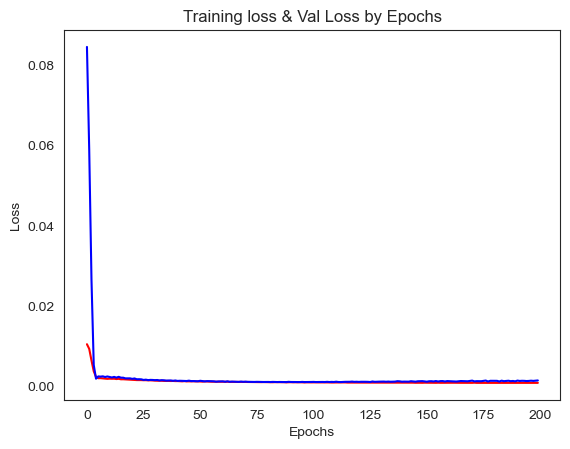

<Figure size 640x480 with 0 Axes>

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import L1L2
 
model5 = Sequential()

model5.add(LSTM(units = 60, return_sequences=True, input_shape=(5, var),  activation ='tanh'))
           
model5.add(Dropout(0.05))

model5.add(LSTM(units = 60, return_sequences = True,  activation ='tanh'))
model5.add(Dropout(0.05))


model5.add(Dense(1))

model5.summary()

model5.compile(optimizer = 'adam', loss = 'mean_squared_error')

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=50)

history_simple = model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs = 200, batch_size = 15, shuffle=False)


loss=history_simple.history['loss']
val_loss = history_simple.history['val_loss']


epochs=range(len(loss)) # Get number of epochs
# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r',label='loss')
plt.plot(epochs,val_loss,'blue',label='val loss')
plt.title('Training loss & Val Loss by Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.figure()
     

In [43]:
def plot_predictions2(model, X, y):
  predictions = model.predict(X)
  wti_preds = predictions[:,0]
  wti_actuals = y
  df = pd.DataFrame(data={'WTI Predictions': wti_preds.flatten(),
                          'WTI Actuals':wti_actuals.flatten()
        
                          })
  plt.plot(df['WTI Predictions'])
  plt.plot(df['WTI Actuals'])
  return df

In [44]:

def postprocess_p(arr):
  arr = (arr* (wti_test_max3 - wti_test_min3)) + wti_test_min3
  return arr
wti_test_max3


114.38

In [45]:
X3_train.shape

(4211, 5, 3)

In [46]:
def get_predictions_val(X_val):
    
    val_predictions = model5.predict(X_val)
    val_predictions = postprocess_p(val_predictions[:,0]).flatten()
    Y_val_reverse = postprocess_p(y3_val).flatten()
    global val_results
    val_results = pd.DataFrame(data={ 'Val Predictions':val_predictions, 'Actuals':Y_val_reverse})
    return val_results

get_predictions_val(X3_val).head(10)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,Val Predictions,Actuals
0,91.800270,93.327629
1,91.236107,93.726076
2,91.375015,93.458267
3,91.328262,94.026544
4,91.537857,93.706480
5,91.495506,93.739140
6,91.823387,93.713012
7,91.542267,93.595438
8,92.070541,92.818139
9,91.753387,93.275374


In [47]:
model5.predict(X3_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[[0.06094664],
        [0.10859451],
        [0.13924178],
        [0.1410914 ],
        [0.11000919]],

       [[0.11117026],
        [0.15018839],
        [0.15242082],
        [0.11359259],
        [0.12973386]],

       [[0.15045154],
        [0.16360345],
        [0.11997318],
        [0.13338897],
        [0.11578646]],

       ...,

       [[0.30143565],
        [0.32171085],
        [0.31666327],
        [0.30102646],
        [0.27149117]],

       [[0.31651196],
        [0.31731284],
        [0.30229998],
        [0.27125907],
        [0.24221951]],

       [[0.31080246],
        [0.30326852],
        [0.271999  ],
        [0.2419574 ],
        [0.25608373]]], dtype=float32)

In [48]:
def result_metrics_forecast(test_series,forecast_series,model_name):
  print('Result Metrics for ' +  str(model_name))
  print('R2 Score : ',round(r2_score(test_series,forecast_series),3))
  print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),3))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))
  fig = plt.figure(figsize=(8,5))
  plt.plot(test_series,label='Actual')
  plt.plot(forecast_series,label='Predicted')
  plt.title(str(model_name))
  plt.ylabel('Price')
  plt.legend()
     
    
    

In [49]:
result_metrics_forecast(val_results['Actuals'], val_results['Val Predictions'],'Multivariate LSTM for validation data')

Result Metrics for Multivariate LSTM for validation data


NameError: name 'r2_score' is not defined

In [50]:
def plot_predictions_final(model, X, y):
  predictions = model.predict(X)
  wti_preds = postprocess_p(predictions[:,0])
  actuals = postprocess_p(y)
  global df
  df = pd.DataFrame(data={
                          'WTI Actuals': actuals.flatten(),
                          'WTI Predictions': wti_preds.flatten(),
                          })
  plt.plot(df['WTI Actuals'])
  plt.plot(df['WTI Predictions'])
  plt.title('Multivariate LSTM model')
  plt.ylabel('Price')
  fig = plt.figure(figsize=(8,5))
  return df

In [51]:
predictions = model5.predict(X3_test)
predictions.shape

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step


(597, 5, 1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


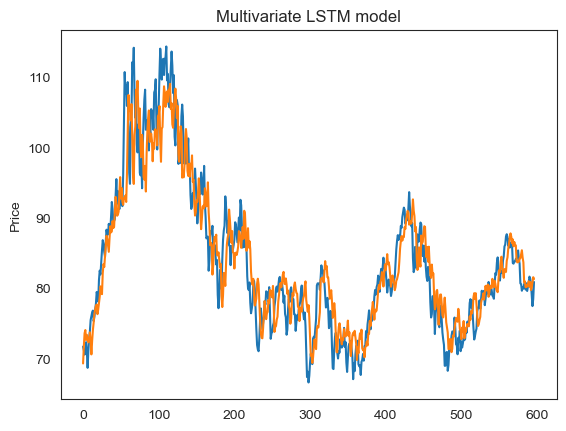

<Figure size 800x500 with 0 Axes>

In [52]:
post_processed_df = plot_predictions_final(model5, X3_test, y3_test)

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def result_metrics_forecast(test_series,forecast_series,model_name):
  print('Result Metrics for ' +  str(model_name))
  print('R2 Score : ',round(r2_score(test_series,forecast_series),4))
  print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),4))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),4))

In [54]:

result_metrics_forecast(df['WTI Actuals'], df['WTI Predictions'],'Multivariate LSTM')

Result Metrics for Multivariate LSTM
R2 Score :  0.8497
Mean Squared Error :  17.9876
Mean Absolute Error :  3.1452


# R2 Score	0.842
Mean Squared Error  	19.388  
Mean Absolute Error	3.255  


In [ ]:
Добавили Брент


Validation

R2 Score :  0.9344
Mean Squared Error :  3.9674
Mean Absolute Error :  1.5087



Test

Result Metrics for Multivariate LSTM
R2 Score :  0.8334
Mean Squared Error :  17.2652
Mean Absolute Error :  3.1079

In [ ]:

Добавили Брент и Доллар к Евро



Validation
R2 Score :  0.939
Mean Squared Error :  4.109
Mean Absolute Error :  1.518



Test

R2 Score :  0.8465
Mean Squared Error :  18.3639
Mean Absolute Error :  3.197
​

In [ ]:
Золото

R2 Score :  0.923
Mean Squared Error :  5.629
Mean Absolute Error :  1.81


Еуые
Result Metrics for Multivariate LSTM
R2 Score :  0.8457
Mean Squared Error :  18.925
Mean Absolute Error :  3.2742





Для Насдака
Result Metrics for Multivariate LSTM for validation data
R2 Score :  0.919
Mean Squared Error :  5.461
Mean Absolute Error :  1.769



Result Metrics for Multivariate LSTM
R2 Score :  0.8418
Mean Squared Error :  18.9271
Mean Absolute Error :  3.2782








оппер тоже ухудшает



Добавили Dow Jones
Result Metrics for Multivariate LSTM for validation data
R2 Score :  0.828
Mean Squared Error :  11.556
Mean Absolute Error :  2.954
    
    
Result Metrics for Multivariate LSTM
R2 Score :  0.8196
Mean Squared Error :  21.5889
Mean Absolute Error :  3.4866   
    






Добавили S&P 500 вместо DJ

R2 Score :  0.882
Mean Squared Error :  7.955
Mean Absolute Error :  2.38
    
    
Result Metrics for Multivariate LSTM
R2 Score :  0.8381
Mean Squared Error :  19.3724
Mean Absolute Error :  3.2389



Добавили Gas


R2 Score :  0.945
Mean Squared Error :  3.993
Mean Absolute Error :  1.494

    
R2 Score :  0.8371
Mean Squared Error :  19.9763
Mean Absolute Error :  3.397





Добавили Fed Fund 
Result Metrics for Multivariate LSTM
R2 Score :  0.8349
Mean Squared Error :  20.2524
Mean Absolute Error :  3.4452
    
    

US CPI Total
2 Score :  0.8332
Mean Squared Error :  17.6953
Mean Absolute Error :  3.2176
    

    
US CPI energy


R2 Score :  0.941
Mean Squared Error :  3.993
Mean Absolute Error :  1.491
    
Result Metrics for Multivariate LSTM
R2 Score :  0.8466
Mean Squared Error :  18.3565
Mean Absolute Error :  3.2032

In [ ]:
EU PPI
Точно нет, сильное ухудшение



US_PPI: TOTAL
Тоже нет, сильное ухудшение

Result Metrics for Multivariate LSTM with Bitcoin  
R2 Score :  0.695  
Mean Squared Error :  46.465  
Mean Absolute Error :  5.567  

Result Metrics for Multivariate LSTM without Bitcoin  
R2 Score :  0.705  
Mean Squared Error :  45.003  
Mean Absolute Error :  5.349  

После интерполяции и убирания пустых значений  
Result Metrics for Multivariate LSTM  
R2 Score :  0.772  
Mean Squared Error :  35.041  
Mean Absolute Error :  4.284  

После внедрения 100 эпох   
Result Metrics for Multivariate LSTM  
R2 Score :  0.784  
Mean Squared Error :  27.322  
Mean Absolute Error :  3.829  


Result Metrics for Multivariate LSTM  
R2 Score :  0.8427  
Mean Squared Error :  24.1262  
Mean Absolute Error :  3.5541  

Result Metrics for Multivariate LSTM (with all variables without Bitcoin)  
R2 Score :  0.3422  
Mean Squared Error :  22.1064  
Mean Absolute Error :  3.7622  

# Multivariate GRU model

In [55]:
import pandas as pd
econ_df_multivariate = pd.read_csv('econ_df_1')

import pandas as pd
pd.DataFrame(econ_df_multivariate.head(10))

,Date,Dow Jones,WTI,Dollar/Euro,NASDAQ,Brent,US_CPI:energy:,US_CPI:total:,US_PPI:total,Fed Fund Effective,EU PPI,S&P500,Copper,Gold,Gas,Bitcoin
0,2000-01-01,NaN,NaN,NaN,NaN,NaN,115.0,169.3,128.3,5.45,58.9,NaN,NaN,NaN,NaN,NaN
1,2000-01-03,11357.500000,NaN,1.0155,4131.15,NaN,115.0,169.3,128.3,5.45,58.9,1455.219971,NaN,NaN,NaN,NaN
2,2000-01-04,10997.900391,25.56,1.0309,3901.69,23.95,115.0,169.3,128.3,5.45,58.9,1399.420044,NaN,NaN,NaN,NaN
3,2000-01-05,11122.700195,24.65,1.0335,3877.54,23.72,115.0,169.3,128.3,5.45,58.9,1402.109985,NaN,NaN,NaN,NaN
4,2000-01-06,11253.299805,24.79,1.0324,3727.13,23.55,115.0,169.3,128.3,5.45,58.9,1403.449951,NaN,NaN,NaN,NaN
5,2000-01-07,11522.599609,24.79,1.0294,3882.62,23.35,115.0,169.3,128.3,5.45,58.9,1441.469971,NaN,NaN,NaN,NaN
6,2000-01-10,11572.200195,24.71,1.0252,4049.67,22.77,115.0,169.3,128.3,5.45,58.9,1457.599976,NaN,NaN,NaN,NaN
7,2000-01-11,11511.099609,25.69,1.0322,3921.19,23.93,115.0,169.3,128.3,5.45,58.9,1438.560059,NaN,NaN,NaN,NaN
8,2000-01-12,11551.099609,26.30,1.0281,3850.02,24.62,115.0,169.3,128.3,5.45,58.9,1432.250000,NaN,NaN,NaN,NaN
9,2000-01-13,11582.400391,26.63,1.0270,3957.21,24.90,115.0,169.3,128.3,5.45,58.9,1449.680054,NaN,NaN,NaN,NaN


In [56]:
econ_df_multivariate.index = econ_df_multivariate['Date']
del econ_df_multivariate['Date']

In [57]:
econ_df_multivariate.dropna(subset = ['WTI'], inplace=True)

In [58]:
econ_df_multivariate.columns

Index(['Dow Jones', 'WTI', 'Dollar/Euro', 'NASDAQ', 'Brent', 'US_CPI:energy:',
       'US_CPI:total:', 'US_PPI:total', 'Fed Fund Effective', 'EU PPI',
       'S&P500', 'Copper', 'Gold', 'Gas', 'Bitcoin'],
      dtype='object')

In [59]:
from scipy.stats import zscore as zs

zscore = np.abs(zs(econ_df_multivariate['WTI']))
zscore_df = econ_df_multivariate.copy()
zscore_df['zscore'] = zscore
zscore_df.head(5)
len(zscore_df[zscore_df['zscore']>2])

zscore_df = zscore_df.loc[zscore_df['zscore']<2]
zscore_df.shape
del zscore_df['zscore']
econ_df_multivariate = zscore_df

In [60]:

econ_df_multivariate = econ_df_multivariate[['WTI', 'Dollar/Euro']]

l = len(econ_df_multivariate)
round((econ_df_multivariate.isnull().sum()/l)*100, 2)
econ_df_multivariate.dropna(inplace=True)
len(econ_df_multivariate)
#addy

C:\Users\p.busheva\AppData\Local\Temp\ipykernel_30448\2572865650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econ_df_multivariate.dropna(inplace=True)


5963

In [61]:
var = len(econ_df_multivariate.columns)

In [62]:
var

2

In [63]:
import numpy as np
col = ['US_PPI:total:']
clean_signal = econ_df_multivariate[col].values
clean_signal

import numpy as np 
mu, sigma = 0, 0.001
noise = np.random.normal(mu, sigma, [len(econ_df_multivariate),1])
noise

signal = clean_signal + noise
econ_df_multivariate[col] = signal

KeyError: "None of [Index(['US_PPI:total:'], dtype='object')] are in the [columns]"

In [64]:
import numpy as np
X4, y4 = df_to_X_y3(econ_df_multivariate)
print(X4.shape, y4.shape)

train_size = int(len(econ_df_multivariate) * 0.70)
validation_size = int(len(econ_df_multivariate) * 0.20)
test_size = len(econ_df_multivariate) - train_size - validation_size
X4_train, X4_val, X4_test = X4[0:train_size], X4[train_size:train_size+validation_size], X4[train_size+validation_size:len(X4)]

y4_train, y4_val, y4_test =  y4[0:train_size], y4[train_size:train_size+validation_size], y4[train_size+validation_size:len(X4)]


(5958, 5, 2) (5958, 1)


In [65]:
import numpy as np

wti_training_max4 = np.max(X4_train[:, :, 0].flatten())
wti_training_min4 = np.min(X4_train[:, :, 0].flatten())


wti_test_max4 = np.max(X4_test[:, :, 0].flatten())
wti_test_min4 = np.min(X4_test[:, :, 0].flatten())


wti_val_max4 = np.max(X4_val[:, :, 0].flatten())
wti_val_min4 = np.min(X4_val[:, :, 0].flatten())

def preprocess4_train(X):
    for j in range(0, var):
      X[:, :, j] = (X[:, :, j] - np.min(X4_train[:, :, j])) / (np.max(X4_train[:, :, j]) - np.min(X4_train[:, :, j]))
    
    
def preprocess4_test(X):
    for j in range(0, var):
      X[:, :, j] = (X[:, :, j] - np.min(X4_test[:, :, j])) / (np.max(X4_test[:, :, j]) - np.min(X4_test[:, :, j]))
    
    
    
def preprocess4_val(X):
    for j in range(0, var):
      X[:, :, j] = (X[:, :, j] - np.min(X4_val[:, :, j])) / (np.max(X4_val[:, :, j]) - np.min(X4_val[:, :, j]))
    
def preprocess_output4_train(y):
  y[:, 0] = (y[:, 0] - wti_training_min4) / (wti_training_max4 - wti_training_min4)




def preprocess_output4_test(y):
  y[:, 0] = (y[:, 0] - wti_test_min4) / (wti_test_max4 - wti_test_min4)



def preprocess_output4_val(y):
  y[:, 0] = (y[:, 0] - wti_val_min4) / (wti_val_max4 - wti_val_min4)
  return y

preprocess4_train(X4_train)
preprocess4_val(X4_val)
preprocess4_test(X4_test)

preprocess_output4_train(y4_train)
preprocess_output4_val(y4_val)
preprocess_output4_test(y4_test)

In [ ]:
X4_train.shape, y4_train.shape, X4_val.shape, y4_val.shape, X4_test.shape, y4_test.shape

In [ ]:
y4_train

In [ ]:
from keras.layers import GRU

# The GRU architecture
regressor_gru = Sequential()
# First GRU layer with Dropout regularisation
regressor_gru.add(GRU(units=60, return_sequences=True, input_shape=(5, var), activation='tanh'))
regressor_gru.add(Dropout(0.05))
# Second GRU layer
regressor_gru.add(GRU(units=60, return_sequences=True, activation='tanh'))
regressor_gru.add(Dropout(0.05))
# The output layer
regressor_gru.add(Dense(units=1))
# Compiling the RNN
regressor_gru.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

history_simple = regressor_gru.fit(X4_train, y4_train, epochs = 100, batch_size = 15,validation_data=(X4_val,y4_val),shuffle=False, callbacks = [es])



loss=history_simple.history['loss']
val_loss = history_simple.history['val_loss']
epochs=range(len(loss)) # Get number of epochs
# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r',label='loss')
plt.plot(epochs,val_loss,'blue',label='val loss')
plt.title('Training loss & Val Loss by Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.figure()

In [ ]:
def postprocess_p_gru(arr):
  arr = (arr* (wti_test_max4 - wti_test_min4)) + wti_test_min4
  return arr

In [ ]:
val_predictions = regressor_gru.predict(X4_val)
val_predictions[:,0].shape

In [ ]:
postprocess_p(y3_val).shape

In [ ]:
def get_predictions_val(X_val):
    
    val_predictions = regressor_gru.predict(X4_val)
    val_predictions = postprocess_p(val_predictions[:,0]).flatten()
    Y_val_reverse = postprocess_p(y4_val).flatten()
    global val_results
    val_results = pd.DataFrame(data={ 'Val Predictions':val_predictions, 'Actuals':Y_val_reverse})
    return val_results

get_predictions_val(X3_val).head(10)

In [ ]:
def result_metrics_forecast(test_series,forecast_series,model_name):
  print('Result Metrics for ' +  str(model_name))
  print('R2 Score : ',round(r2_score(test_series,forecast_series),3))
  print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),3))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))
  fig = plt.figure(figsize=(8,5))
  plt.plot(test_series,label='Actual')
  plt.plot(forecast_series,label='Predicted')
  plt.title(str(model_name))
  plt.ylabel('Price')
  plt.legend()
     


result_metrics_forecast(val_results['Actuals'], val_results['Val Predictions'],'Multivariate Validation GRU')

In [ ]:
def plot_predictions_final_gru(model, X, y):
  predictions = regressor_gru.predict(X)
  wti_preds = postprocess_p_gru(predictions[:,0])
  actuals = postprocess_p_gru(y)
  global df2
  df2 = pd.DataFrame(data={
                          'WTI Actuals': actuals.flatten(),
                          'WTI Predictions': wti_preds.flatten(),
                          })
  plt.plot(df2['WTI Actuals'])
  plt.plot(df2['WTI Predictions'])
  plt.title('Multivariate GRU model')
  plt.ylabel('Price')
  fig = plt.figure(figsize=(8,5))
  return df2

In [ ]:
plot_predictions_final_gru(regressor_gru, X4_test, y4_test)

In [ ]:
def result_metrics_forecast(test_series,forecast_series,model_name):
  print('Result Metrics for ' +  str(model_name))
  print('R2 Score : ',round(r2_score(test_series,forecast_series),3))
  print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),3))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))
  fig = plt.figure(figsize=(8,5))
  plt.plot(test_series,label='Actual')
  plt.plot(forecast_series,label='Predicted')
  plt.title(str(model_name))
  plt.ylabel('Price')
  plt.legend()
     

In [ ]:
result_metrics_forecast(df2['WTI Actuals'], df2['WTI Predictions'],'Multivariate GRU')

In [ ]:
[['WTI', 'Brent', 'Dollar/Euro', 'Copper']]


Result Metrics for Multivariate Validation GRU
R2 Score :  0.942
Mean Squared Error :  3.977
Mean Absolute Error :  1.482

Result Metrics for Multivariate GRU
R2 Score :  0.842
Mean Squared Error :  18.906
Mean Absolute Error :  3.279

In [ ]:
[['WTI', 'Brent', 'Dollar/Euro', 'NASDAQ']]
Result Metrics for Multivariate Validation GRU
R2 Score :  0.929
Mean Squared Error :  4.72
Mean Absolute Error :  1.646
    
    
    
Result Metrics for Multivariate GRU
R2 Score :  0.842
Mean Squared Error :  19.176
Mean Absolute Error :  3.284
    

In [ ]:
[['WTI', 'Brent', 'Dollar/Euro', 'Gold']]

Result Metrics for Multivariate GRU
R2 Score :  0.84
Mean Squared Error :  19.071
Mean Absolute Error :  3.323

In [ ]:
[['WTI', 'Dollar/Euro', 'Gold']]

Result Metrics for Multivariate GRU
R2 Score :  0.844
Mean Squared Error :  18.84
Mean Absolute Error :  3.295

In [ ]:

[['WTI', 'Dollar/Euro', 'Gold', 'Gas']]


Result Metrics for Multivariate Validation GRU
R2 Score :  0.894
Mean Squared Error :  7.484
Mean Absolute Error :  2.076



Result Metrics for Multivariate GRU
R2 Score :  0.847
Mean Squared Error :  18.405
Mean Absolute Error :  3.269

In [ ]:

[['WTI', 'Dollar/Euro', 'Gold', 'Gas', "US_CPI_energy"]]

Result Metrics for Multivariate GRU
R2 Score :  0.84
Mean Squared Error :  19.31
Mean Absolute Error :  3.402

In [ ]:

[['WTI', 'Dollar/Euro', 'Gold', 'Gas', US PPI total]]

После интерполяции и убирания пустых значений  
Result Metrics for Multivariate GRU  
R2 Score :  0.782  
Mean Squared Error :  33.382  
Mean Absolute Error :  4.191  

После добавления 100 эпох  

Result Metrics for Multivariate GRU  
R2 Score :  0.754  
Mean Squared Error :  31.137  
Mean Absolute Error :  4.121  

Result Metrics for Multivariate GRU (после того как убрали ненужные дейли переменные)
R2 Score :  0.8398  
Mean Squared Error :  24.5823  
Mean Absolute Error :  3.7435  

Result Metrics for Multivariate GRU  (послу того как добавили 2 месячных переменных
R2 Score :  0.2391  
Mean Squared Error :  25.5683  
Mean Absolute Error :  4.1459  

# Multivariate CNN model

In [170]:
import pandas as pd
econ_df_multivariate = pd.read_csv('econ_df_1')

import pandas as pd
pd.DataFrame(econ_df_multivariate.head(10))

,Date,Dow Jones,WTI,Dollar/Euro,NASDAQ,Brent,US_CPI:energy:,US_CPI:total:,US_PPI:total,Fed Fund Effective,EU PPI,S&P500,Copper,Gold,Gas,Bitcoin
0,2000-01-01,NaN,NaN,NaN,NaN,NaN,115.0,169.3,128.3,5.45,58.9,NaN,NaN,NaN,NaN,NaN
1,2000-01-03,11357.500000,NaN,1.0155,4131.15,NaN,115.0,169.3,128.3,5.45,58.9,1455.219971,NaN,NaN,NaN,NaN
2,2000-01-04,10997.900391,25.56,1.0309,3901.69,23.95,115.0,169.3,128.3,5.45,58.9,1399.420044,NaN,NaN,NaN,NaN
3,2000-01-05,11122.700195,24.65,1.0335,3877.54,23.72,115.0,169.3,128.3,5.45,58.9,1402.109985,NaN,NaN,NaN,NaN
4,2000-01-06,11253.299805,24.79,1.0324,3727.13,23.55,115.0,169.3,128.3,5.45,58.9,1403.449951,NaN,NaN,NaN,NaN
5,2000-01-07,11522.599609,24.79,1.0294,3882.62,23.35,115.0,169.3,128.3,5.45,58.9,1441.469971,NaN,NaN,NaN,NaN
6,2000-01-10,11572.200195,24.71,1.0252,4049.67,22.77,115.0,169.3,128.3,5.45,58.9,1457.599976,NaN,NaN,NaN,NaN
7,2000-01-11,11511.099609,25.69,1.0322,3921.19,23.93,115.0,169.3,128.3,5.45,58.9,1438.560059,NaN,NaN,NaN,NaN
8,2000-01-12,11551.099609,26.30,1.0281,3850.02,24.62,115.0,169.3,128.3,5.45,58.9,1432.250000,NaN,NaN,NaN,NaN
9,2000-01-13,11582.400391,26.63,1.0270,3957.21,24.90,115.0,169.3,128.3,5.45,58.9,1449.680054,NaN,NaN,NaN,NaN


In [171]:
econ_df_multivariate.index = econ_df_multivariate['Date']
del econ_df_multivariate['Date']

In [172]:
econ_df_multivariate.dropna(subset = ['WTI'], inplace=True)

In [173]:
econ_df_multivariate.columns

Index(['Dow Jones', 'WTI', 'Dollar/Euro', 'NASDAQ', 'Brent', 'US_CPI:energy:',
       'US_CPI:total:', 'US_PPI:total', 'Fed Fund Effective', 'EU PPI',
       'S&P500', 'Copper', 'Gold', 'Gas', 'Bitcoin'],
      dtype='object')

In [174]:
from scipy.stats import zscore as zs

zscore = np.abs(zs(econ_df_multivariate['WTI']))
zscore_df = econ_df_multivariate.copy()
zscore_df['zscore'] = zscore
zscore_df.head(5)
len(zscore_df[zscore_df['zscore']>2])

zscore_df = zscore_df.loc[zscore_df['zscore']<2]
zscore_df.shape
del zscore_df['zscore']
econ_df_multivariate = zscore_df

In [192]:
econ_df_multivariate = econ_df_multivariate[['WTI', 'Dollar/Euro', 'Copper', 'Brent']]

l = len(econ_df_multivariate)
round((econ_df_multivariate.isnull().sum()/l)*100, 2)
econ_df_multivariate.dropna(inplace=True)
len(econ_df_multivariate)
#addy

5743

In [193]:
var = len(econ_df_multivariate.columns)

In [194]:
def postprocess_p_gru(arr):
  arr = (arr* (wti_test_max4 - wti_test_min4)) + wti_test_min4
  return arr

In [195]:
import numpy as np

X4, y4 = df_to_X_y3(econ_df_multivariate)
print(X4.shape, y4.shape)

train_size = int(len(econ_df_multivariate) * 0.70)
validation_size = int(len(econ_df_multivariate) * 0.20)
test_size = len(econ_df_multivariate) - train_size - validation_size
X4_train, X4_val, X4_test = X4[0:train_size], X4[train_size:train_size+validation_size], X4[train_size+validation_size:len(X4)]

y4_train, y4_val, y4_test =  y4[0:train_size], y4[train_size:train_size+validation_size], y4[train_size+validation_size:len(X4)]


(5738, 5, 4) (5738, 1)


In [196]:
X4

array([[[33.25      ,  0.8924    ,  0.88499999, 34.13      ],
        [33.09      ,  0.8878    ,  0.88499999, 35.08      ],
        [33.42      ,  0.8993    ,  0.889     , 35.09      ],
        [33.92      ,  0.8876    ,  0.90600002, 35.72      ],
        [34.97      ,  0.8702    ,  0.90149999, 36.7       ]],

       [[33.09      ,  0.8878    ,  0.88499999, 35.08      ],
        [33.42      ,  0.8993    ,  0.889     , 35.09      ],
        [33.92      ,  0.8876    ,  0.90600002, 35.72      ],
        [34.97      ,  0.8702    ,  0.90149999, 36.7       ],
        [35.18      ,  0.874     ,  0.90600002, 37.43      ]],

       [[33.42      ,  0.8993    ,  0.889     , 35.09      ],
        [33.92      ,  0.8876    ,  0.90600002, 35.72      ],
        [34.97      ,  0.8702    ,  0.90149999, 36.7       ],
        [35.18      ,  0.874     ,  0.90600002, 37.43      ],
        [33.62      ,  0.8664    ,  0.912     , 36.27      ]],

       ...,

       [[80.23      ,  1.086     ,  4.96950006, 79.

In [197]:

import numpy as np

wti_training_max4 = np.max(X4_train[:, :, 0].flatten())
wti_training_min4 = np.min(X4_train[:, :, 0].flatten())


wti_test_max4 = np.max(X4_test[:, :, 0].flatten())
wti_test_min4 = np.min(X4_test[:, :, 0].flatten())


wti_val_max4 = np.max(X4_val[:, :, 0].flatten())
wti_val_min4 = np.min(X4_val[:, :, 0].flatten())

In [198]:
wti_training_max4

114.85

In [199]:
def preprocess4_train(X):
    for j in range(0, var):
      X[:, :, j] = (X[:, :, j] - np.min(X4_train[:, :, j])) / (np.max(X4_train[:, :, j]) - np.min(X4_train[:, :, j]))
    return X
          
    
def preprocess4_test(X):
    for j in range(0, var):
      X[:, :, j] = (X[:, :, j] - np.min(X4_test[:, :, j])) / (np.max(X4_test[:, :, j]) - np.min(X4_test[:, :, j]))
    
    
    
def preprocess4_val(X):
    for j in range(0, var):
      X[:, :, j] = (X[:, :, j] - np.min(X4_val[:, :, j])) / (np.max(X4_val[:, :, j]) - np.min(X4_val[:, :, j]))
    
def preprocess_output4_train(y):
  y[:, 0] = (y[:, 0] - wti_training_min4) / (wti_training_max4 - wti_training_min4)
  




def preprocess_output4_test(y):
  y[:, 0] = (y[:, 0] - wti_test_min4) / (wti_test_max4 - wti_test_min4)



def preprocess_output4_val(y):
  y[:, 0] = (y[:, 0] - wti_val_min4) / (wti_val_max4 - wti_val_min4)
  return y

In [200]:

preprocess4_train(X4_train)
preprocess4_val(X4_val)
preprocess4_test(X4_test)

preprocess_output4_train(y4_train)
preprocess_output4_val(y4_val)
preprocess_output4_test(y4_test)

In [201]:

print(preprocess4_train(X4_train))

[[[0.16178737 0.08484691 0.06991789 0.15784287]
  [0.16014381 0.07887909 0.06991789 0.16635313]
  [0.16353364 0.09379865 0.07091317 0.16644271]
  [0.16866975 0.07861962 0.07514308 0.17208636]
  [0.17945557 0.05604567 0.07402339 0.18086536]]

 [[0.16014381 0.07887909 0.06991789 0.16635313]
  [0.16353364 0.09379865 0.07091317 0.16644271]
  [0.16866975 0.07861962 0.07514308 0.17208636]
  [0.17945557 0.05604567 0.07402339 0.18086536]
  [0.18161274 0.06097561 0.07514308 0.18740482]]

 [[0.16353364 0.09379865 0.07091317 0.16644271]
  [0.16866975 0.07861962 0.07514308 0.17208636]
  [0.17945557 0.05604567 0.07402339 0.18086536]
  [0.18161274 0.06097561 0.07514308 0.18740482]
  [0.16558808 0.05111572 0.07663598 0.17701335]]

 ...

 [[0.34401644 0.3105864  0.49813384 0.32760011]
  [0.34555727 0.3101972  0.51542669 0.3305563 ]
  [0.35120699 0.30889984 0.51045033 0.33243752]
  [0.35695942 0.30435911 0.50783775 0.33799158]
  [0.36527992 0.30306175 0.49713858 0.34291857]]

 [[0.34555727 0.3101972  0

Epoch 1/100


C:\ProgramData\Anaconda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0027 - val_loss: 0.0070
Epoch 2/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.2708e-04 - val_loss: 0.0080
Epoch 3/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.4168e-04 - val_loss: 0.0088
Epoch 4/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.6270e-04 - val_loss: 0.0096
Epoch 5/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0012 - val_loss: 0.0108
Epoch 6/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013 - val_loss: 0.0123
Epoch 7/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - val_loss: 0.0112
Epoch 8/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0010 - val_loss: 0.0103
Epoch 9/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.7750e-04 - val_loss: 0.0093
Epoch 10/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0010 - val_loss: 0.0071
Epoch 11/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.8993e-04 - val_loss: 0.0068
Epoch 12/100
268/268 ━━━━━━━━━━━━

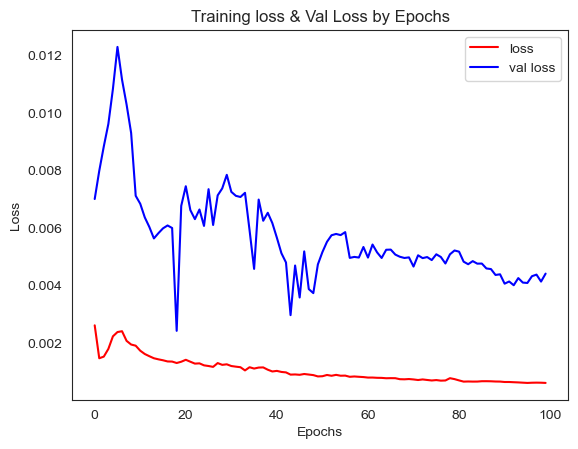

<Figure size 640x480 with 0 Axes>

In [202]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping






model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X4_train.shape[1], X4_train.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer='adam')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

history_simple_1 = model_cnn.fit(X4_train, y4_train, validation_data=(X4_val, y4_val), epochs = 100, batch_size = 15, shuffle=False)


loss=history_simple_1.history['loss']
val_loss = history_simple_1.history['val_loss']


epochs=range(len(loss)) # Get number of epochs
# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r',label='loss')
plt.plot(epochs,val_loss,'blue',label='val loss')
plt.title('Training loss & Val Loss by Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.figure()
#model_cnn.summary()

def plot_predictions_final_cnn(model, X, y):
  predictions = model.predict(X)
  wti_preds = postprocess_p_gru(predictions[:,0])
  actuals = postprocess_p_gru(y4_test)
  global df2
  df2 = pd.DataFrame(data={
                          'WTI Actuals': actuals.flatten(),
                          'WTI Predictions': wti_preds.flatten(),
                          })
  plt.plot(df2['WTI Actuals'])
  plt.plot(df2['WTI Predictions'])
  plt.title('Multivariate CNN model')
  plt.ylabel('Price')
  fig = plt.figure(figsize=(8,5))
  return df2

In [203]:
def result_metrics_forecast(test_series,forecast_series,model_name):
  print('Result Metrics for ' +  str(model_name))
  print('R2 Score : ',round(r2_score(test_series,forecast_series),3))
  print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),3))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))
  fig = plt.figure(figsize=(8,5))
  plt.plot(test_series,label='Actual')
  plt.plot(forecast_series,label='Predicted')
  plt.title(str(model_name))
  plt.ylabel('Price')
  plt.legend()
     

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


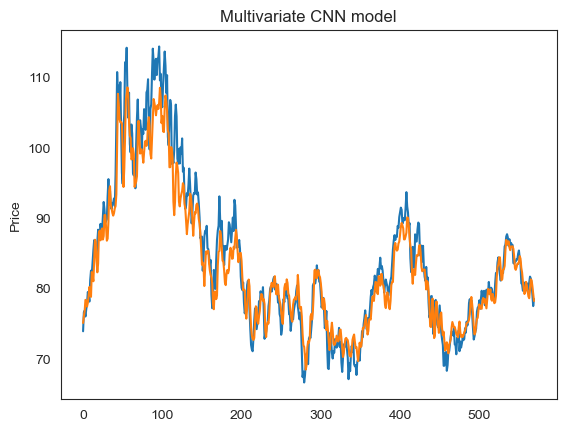

<Figure size 800x500 with 0 Axes>

In [204]:
post_processed_df = plot_predictions_final_cnn(model_cnn, X4_test, y4_test)

Result Metrics for Multivariate CNN
R2 Score :  0.934
Mean Squared Error :  7.914
Mean Absolute Error :  2.152


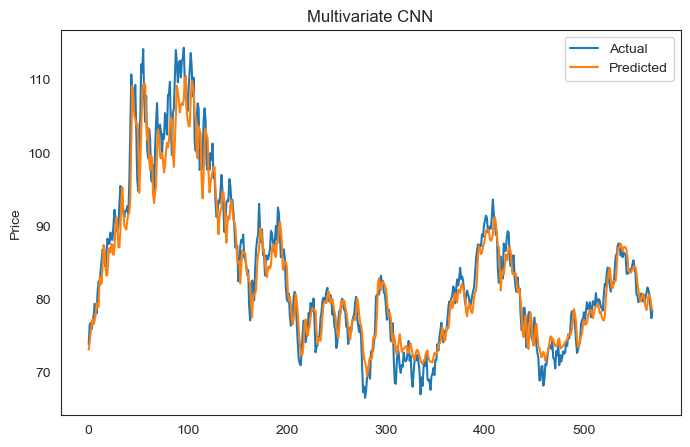

In [188]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
result_metrics_forecast(df2['WTI Actuals'], df2['WTI Predictions'],'Multivariate CNN')

In [189]:
def get_predictions_val(X_val):
    
    val_predictions = model_cnn.predict(X4_val)
    val_predictions = postprocess_p_gru(val_predictions[:,0]).flatten()
    Y_val_reverse = postprocess_p_gru(y4_val).flatten()
    global val_results
    val_results = pd.DataFrame(data={ 'Val Predictions':val_predictions, 'Actuals':Y_val_reverse})
    return val_results

get_predictions_val(X4_val).head(10)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Val Predictions,Actuals
0,90.510422,92.910483
1,90.486198,92.806452
2,90.342079,91.525563
3,89.865074,91.376017
4,89.254883,90.972895
5,88.836220,90.491749
6,88.588821,90.699812
7,88.625694,90.699812
8,88.592804,90.530761
9,88.642532,90.758330


Result Metrics for Multivariate Validation GRU
R2 Score :  0.931
Mean Squared Error :  4.699
Mean Absolute Error :  1.788


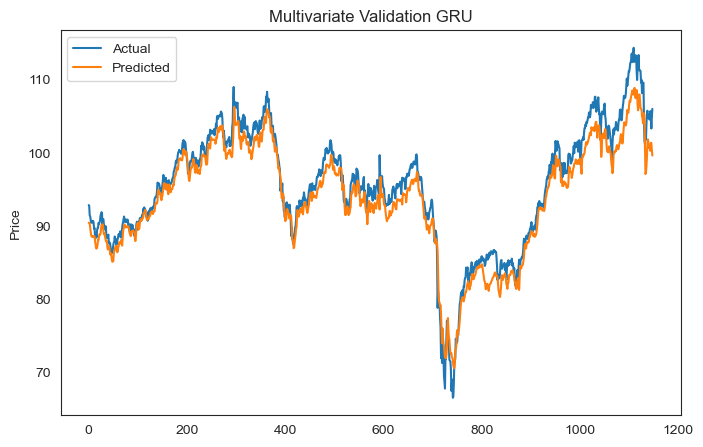

In [190]:
def result_metrics_forecast(test_series,forecast_series,model_name):
  print('Result Metrics for ' +  str(model_name))
  print('R2 Score : ',round(r2_score(test_series,forecast_series),3))
  print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),3))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))
  fig = plt.figure(figsize=(8,5))
  plt.plot(test_series,label='Actual')
  plt.plot(forecast_series,label='Predicted')
  plt.title(str(model_name))
  plt.ylabel('Price')
  plt.legend()
     


result_metrics_forecast(val_results['Actuals'], val_results['Val Predictions'],'Multivariate Validation GRU')

In [191]:
Validation data R2 Score :  0.957
Mean Squared Error :  14.383
Mean Absolute Error :  3.019 
    
    
    
    Test Result Metrics for Multivariate CNN
R2 Score :  0.934
Mean Squared Error :  23.804
Mean Absolute Error :  3.708

SyntaxError: invalid syntax (165475089.py, line 1)

Result Metrics for Multivariate CNN (после интерполяции и убирания всех значений)  
R2 Score :  0.852  
Mean Squared Error :  22.766  
Mean Absolute Error :  3.857  

Result Metrics for Multivariate CNN (после того как использовали 100 эпох)  
R2 Score :  0.881  
Mean Squared Error :  15.127  
Mean Absolute Error :  2.967  

Result Metrics for Multivariate CNN  
R2 Score :  0.886  
Mean Squared Error :  17.467  
Mean Absolute Error :  3.266  